In [1]:
from torchvision import datasets
data_path = '../data-unversioned/'
# 下载训练数据集
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
# 下载验证数据集
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

100.0%


Extracting ../data-unversioned/cifar-10-python.tar.gz to ../data-unversioned/
Files already downloaded and verified


In [2]:
len(cifar10)

50000

In [9]:
img,label = cifar10[10]
img,label

(<PIL.Image.Image image mode=RGB size=32x32>, 4)

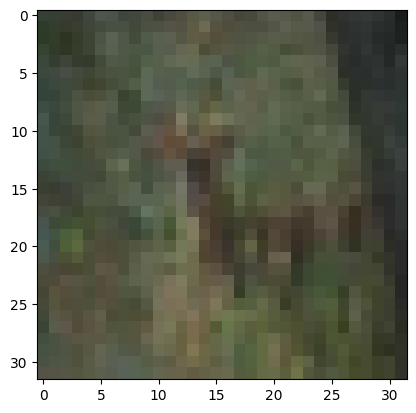

In [10]:
from matplotlib import pyplot as plt
plt.imshow(img)

In [17]:
from torchvision import transforms
# CIFAR-10 数据集中的图像尺寸本来就是 32x32，我这里只是为了演示 transforms.Sequence 的用法
pil_transform = transforms.Compose([
    transforms.ToTensor()
])



In [18]:
cifar10 = datasets.CIFAR10(data_path, train=True, download=True,transform=pil_transform)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True,transform=pil_transform)



Files already downloaded and verified
Files already downloaded and verified


In [20]:
img,_ = cifar10[10]
type(img)

torch.Tensor

In [22]:
img.shape, img.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [24]:
img.min(), img.max() 

(tensor(0.0941), tensor(0.5098))

In [35]:
import torch
# dim 参数从左到右，是保留几维的意思
imgs = torch.stack([img for img,_ in cifar10], dim=3)
imgs.view(3,-1).mean(dim=1), imgs.view(3,-1).std(dim=1)


(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))

In [1]:
from torchvision import datasets
from torchvision import transforms
data_path = '../data-unversioned/'

pil_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))
])

cifar10 = datasets.CIFAR10(data_path, train=True, download=True,transform=pil_transform)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True,transform=pil_transform)



Files already downloaded and verified
Files already downloaded and verified


In [2]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]